### Tommaso Armadillo matr. 885460

# <span style="color:red"> Numerical Exercise 6</span>

## <span style="color:blue"> Exercise 6.1</span>
#### Scope
The scope of the exercise was to complete the C++ code, downloaded from NSL Ariel site, to simulate 1D Ising model with both Metropolis and Gibbs sampling alghoritm to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

At the end of modifications code should be able to estimate
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

Uncertainties are calcoulated with average blocking method.

#### Instruction to compile
Code is in the folder <font face = "Courier"> Esercizio6.1 </font>. It can be compiled using <font face = "Courier"> `$make` </font> and executed with <font face = "Courier"> `$./Monte_Carlo_ISING_1D.exe` </font>. 
In the file <font face = "Courier"> 'input.dat' </font> you can set the starting and final value for temperature, the temperature step, the number of spins, the value of $J$, $h$, if you want to use Metropolis (1) or Gibbs (0), number of block and how many step in each block for every temperature, and if the simulation have to restart (1) or continue (0). 
The code produces four files as output, one for every variable we are computing, with the values of $f(T,N)$ as a function of $T$, with their uncertainties.

#### Internal Energy $U(N,T)$
The Ising model in 1D can be solved exactly starting from the Hamiltonian

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

And the partition function
$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.

If $h=0$ the calculation is straight-forward
$$
U(N,T) = \langle H \rangle
=  \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -N J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

So we can make a comparison.

Before starting the simulation we have to equilibrate the system. To do so we run some simulation without saving results. In this way the variables stabilize aroundtheir mean value. We then save configurations for every temperature so we don't have to equilibrate the system every time we switch temperature. Results for internal energy are plotted below.

We didn't go under $T=0.5$ because at that temperature the system is nearly freezed out, so the acceptance rate of the Metropolis algorithm drops to 0.05 or even less and we are calcoulating mean values of the same configuration over and over.

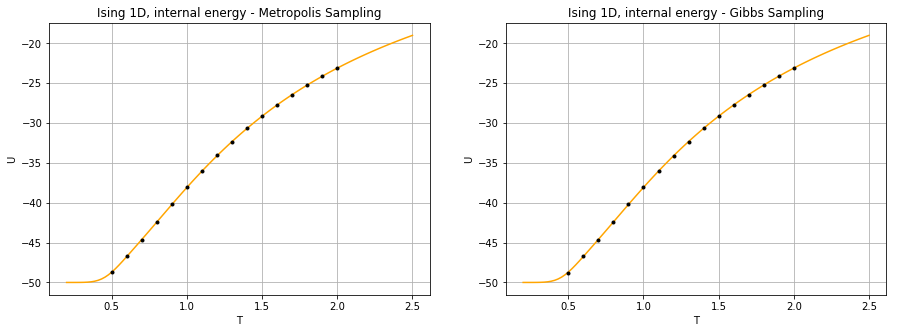

In [104]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

xm, ym, errorm = np.loadtxt("Esercizio6.1/Metropolis/output.ene.0", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errorg = np.loadtxt("Esercizio6.1/Gibbs/output.ene.0", usecols=(0,1,2), delimiter=' ', unpack='true')

points=100
T = np.linspace(0.2,2.5,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -Ns*J*( th + ch*thN )/( 1 + thN )
ax[0].errorbar(xm,ym,yerr=errorm, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 3., color = 'black')
ax[0].grid(True)
ax[0].plot(T, e, color = 'orange')
ax[0].set_title('Ising 1D, internal energy - Metropolis Sampling')
ax[0].set_xlabel('T')
ax[0].set_ylabel('U')
ax[1].errorbar(xg,yg,yerr=errorg, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 3., color = 'black')
ax[1].grid(True)
ax[1].plot(T, e, color = 'orange')
ax[1].set_title('Ising 1D, internal energy - Gibbs Sampling')
ax[1].set_xlabel('T')
ax[1].set_ylabel('U')

plt.show()

Our simulation reproduce the expected value. We don't see any appreciable difference between the Metropolis and Gibbs sampling, meaning that they are both valid method to sample the Boltzmann distribution. We don't see the error bar, this is because they are too small for the y range. Anyway our values are compatible with the expected ones in 2/3 error bar for every point. 

#### Heat Capacity $C_V(N,T)$
It can be calcoulated starting from internal energy

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
C(N,T) = N\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B N(\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$


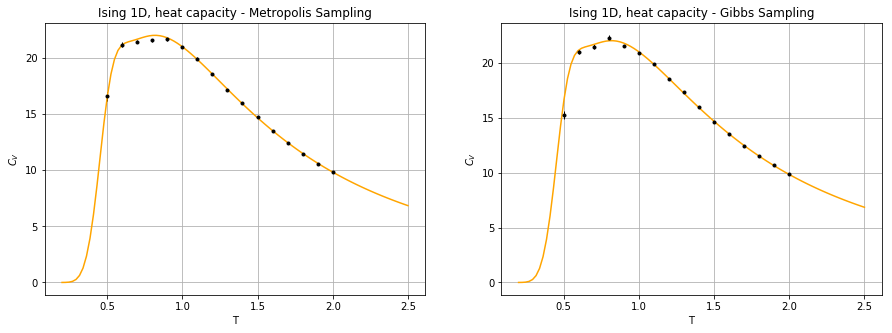

In [98]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

xm, ym, errorm = np.loadtxt("Esercizio6.1/Metropolis/output.heatcap.0", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errorg = np.loadtxt("Esercizio6.1/Gibbs/output.heatcap.0", usecols=(0,1,2), delimiter=' ', unpack='true')

points=100
T = np.linspace(0.2,2.5,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
heat=Ns*((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
ax[0].errorbar(xm,ym,yerr=errorm, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 1., color = 'black')
ax[0].grid(True)
ax[0].plot(T, heat, color = 'orange')
ax[0].set_title('Ising 1D, heat capacity - Metropolis Sampling')
ax[0].set_xlabel('T')
ax[0].set_ylabel('$C_V$')
ax[1].errorbar(xg,yg,yerr=errorg, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 1., color = 'black')
ax[1].grid(True)
ax[1].plot(T, heat, color = 'orange')
ax[1].set_title('Ising 1D, heat capacity - Gibbs Sampling')
ax[1].set_xlabel('T')
ax[1].set_ylabel('$C_V$')

plt.show()

#### Magnetic Susceptibility $\chi(N,T)$

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

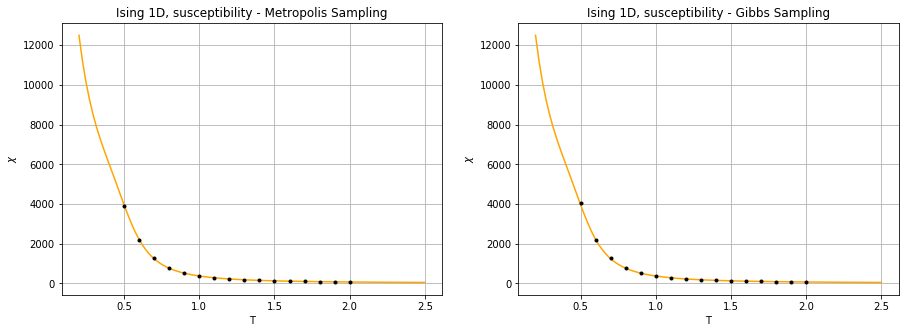

In [99]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

xm, ym, errorm = np.loadtxt("Esercizio6.1/Metropolis/output.susceptibility.0", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errorg = np.loadtxt("Esercizio6.1/Gibbs/output.susceptibility.0", usecols=(0,1,2), delimiter=' ', unpack='true')

points=100
T = np.linspace(0.2,2.5,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
X = Ns*beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
ax[0].errorbar(xm,ym,yerr=errorm, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 1., color = 'black')
ax[0].grid(True)
ax[0].plot(T, X, color = 'orange')
ax[0].set_title('Ising 1D, susceptibility - Metropolis Sampling')
ax[0].set_xlabel('T')
ax[0].set_ylabel('$\chi$')
ax[1].errorbar(xg,yg,yerr=errorg, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 1., color = 'black')
ax[1].grid(True)
ax[1].plot(T, X, color = 'orange')
ax[1].set_title('Ising 1D, susceptibility - Gibbs Sampling')
ax[1].set_xlabel('T')
ax[1].set_ylabel('$\chi$')

plt.show()

#### Magnetization $M(N,Th=0.02)$

With $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula with $h\ne0$ from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

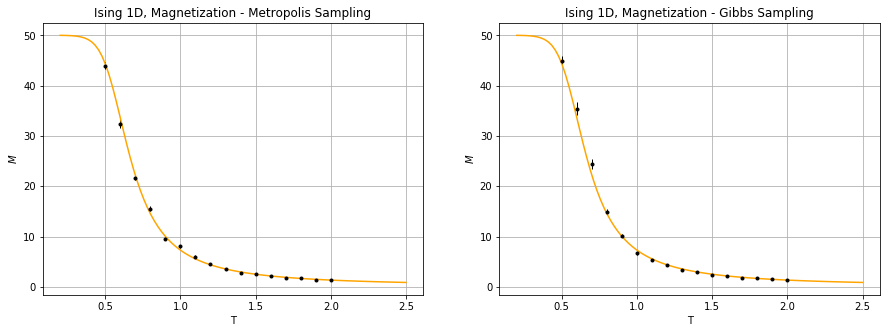

In [101]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

xm, ym, errorm = np.loadtxt("Esercizio6.1/Metropolis/output.magnetization.0", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errorg = np.loadtxt("Esercizio6.1/Gibbs/output.magnetization.0", usecols=(0,1,2), delimiter=' ', unpack='true')

points=100
T = np.linspace(0.2,2.5,num=points)
b = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
M = M*Ns
ax[0].errorbar(xm,ym,yerr=errorm, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 1., color = 'black')
ax[0].grid(True)
ax[0].plot(T, M, color = 'orange')
ax[0].set_title('Ising 1D, Magnetization - Metropolis Sampling')
ax[0].set_xlabel('T')
ax[0].set_ylabel('$M$')
ax[1].errorbar(xg,yg,yerr=errorg, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 1., color = 'black')
ax[1].grid(True)
ax[1].plot(T, M, color = 'orange')
ax[1].set_title('Ising 1D, Magnetization - Gibbs Sampling')
ax[1].set_xlabel('T')
ax[1].set_ylabel('$M$')

plt.show()

Every point in these graphs is the mean value from $N_{block}\times N_{stepforblock}= 20\times 10^4=2\times 10^5$ steps for Metropolis or Gibbs algorithm. For every property of the system our simulation reproduce the expected value.